In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('crime.csv')
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [15]:
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

In [16]:
df = df.set_index('REPORTED_DATE')
df['year'] = df.index.year
df['month'] = df.index.month

# year, month 칼럼 추가

In [17]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year,month
REPORTED_DATE,,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,2014,6
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,2014,6
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,2014,6
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,2014,6
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,2014,6
...,...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,2017,9
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,2017,9
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,2017,9


In [116]:
df['OFFENSE_CATEGORY_ID'].value_counts()

OFFENSE_CATEGORY_ID
traffic-accident                125060
all-other-crimes                 72343
public-disorder                  50807
larceny                          48351
theft-from-motor-vehicle         35945
drug-alcohol                     28984
burglary                         26606
auto-theft                       23453
other-crimes-against-persons     21137
aggravated-assault               10961
robbery                           6559
white-collar-crime                6219
sexual-assault                    3615
arson                              602
murder                             269
Name: count, dtype: int64

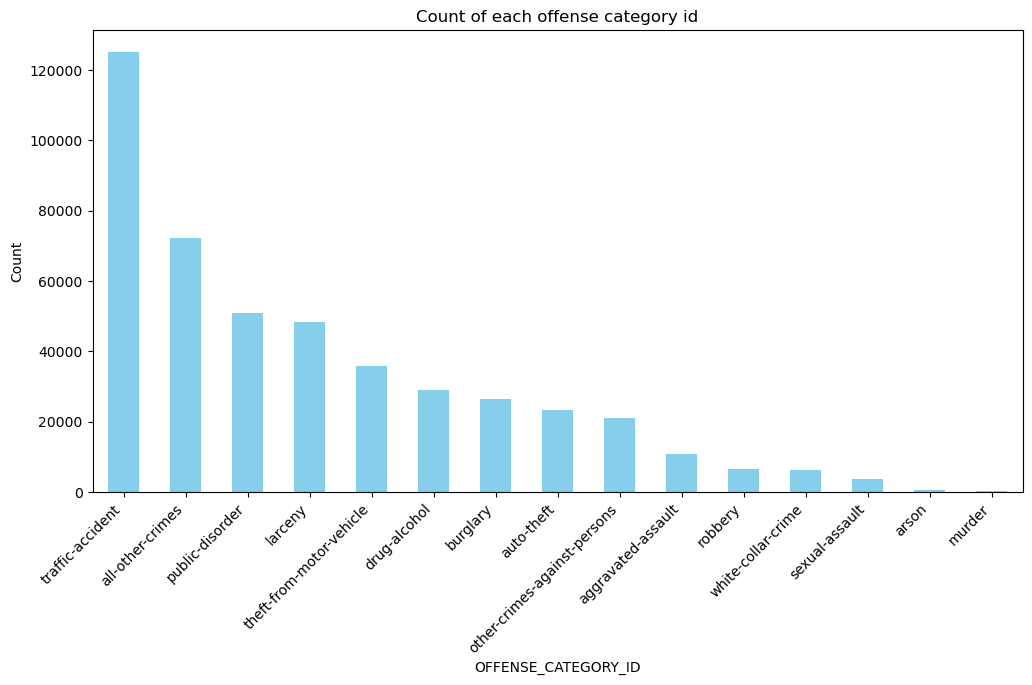

In [117]:
# 시간과 관계없는 범죄 항목 별 빈도 수 시각화

value_counts = df['OFFENSE_CATEGORY_ID'].value_counts()
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('OFFENSE_CATEGORY_ID')
plt.ylabel('Count')
plt.title(f'Count of each offense category id')
plt.xticks(rotation=45, ha='right')

plt.show()

In [18]:
df_crime = df[df['IS_CRIME'] == 1]

<Axes: xlabel='year', ylabel='count'>

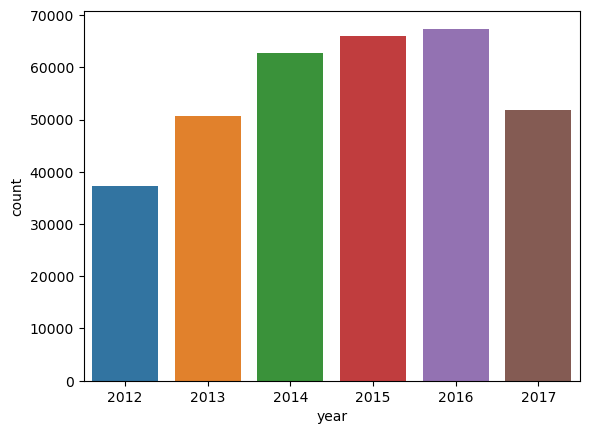

In [19]:
# 연도별 범죄 건수
sns.countplot(x = 'year', data = df_crime)

# 년도별 교통사고 건

In [173]:
df_ta = df[df['OFFENSE_CATEGORY_ID'] == 'traffic-accident']

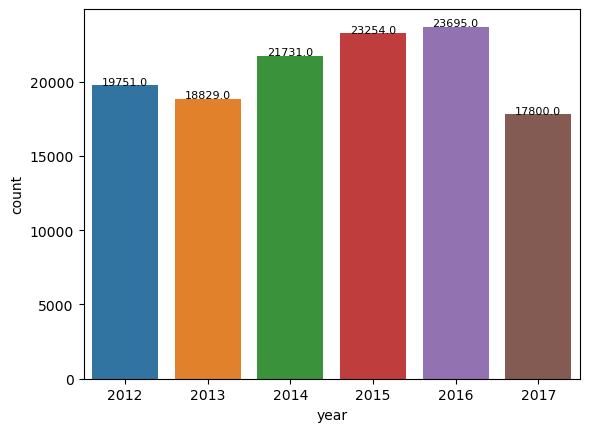

In [185]:
ax = sns.countplot(x='year', data=df_ta)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 8)
plt.show()

### -> 2016년에 23695건으로 가장 많고 2017년에 17800건으로 가장 적다

# 월별 교통사고 건

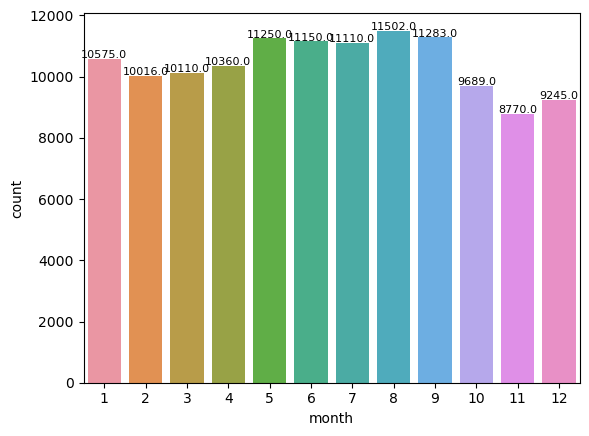

In [184]:
ax = sns.countplot(x='month', data=df_ta)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 8)
plt.show()

### -> 8월에 11502건으로 가장 많고 11월에 8770건으로 가장 적다
### -> 월별로 건수의 차이가 크지 않고 각 월별로 꾸준히 교통사고가 일어나고 있음

# 년도별 마약 건수

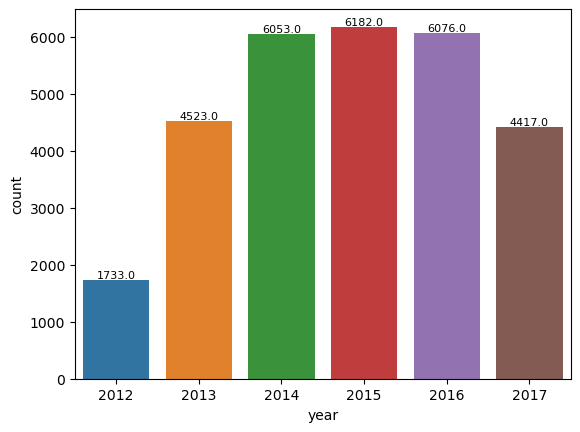

In [194]:
df_da = df[df['OFFENSE_CATEGORY_ID'] == 'drug-alcohol']

ax = sns.countplot(x='year', data=df_da)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 8)
plt.show()

### -> 2012년에 1733건으로 가장 적고 2015년에 6182건으로 가장 많다
### -> 2013년에 마약 건수가 두배 이상 급증했다
### -> 2016년까지 6000건 이상 발생하다가 2017년에 4417건으로 감소했다